# 📦 Performance Supply & Livraison – Olist + IA  

## 🎯 Objectif du projet
Ce projet vise à analyser la **performance logistique** et la **satisfaction client** sur la marketplace **Olist**, en exploitant un jeu de données e-commerce réel.  
L’objectif est de comprendre le parcours **“de la commande à la réception”**, d’identifier les leviers d’amélioration et d’intégrer des briques **d’intelligence artificielle (IA)** pour anticiper les retards et analyser automatiquement les avis clients.


# Découverte des datasets sur Python

## 🧱 Données utilisées
Les données proviennent du **dataset public Olist** disponible sur Kaggle.  
Elles sont réparties en plusieurs tables reliées par `order_id` et `customer_id` :

| Fichier | Description |
|----------|-------------|
| `olist_orders_dataset.csv` | Détails des commandes (dates, statuts, délais estimés) |
| `olist_order_items_dataset.csv` | Articles commandés (produits, vendeurs, prix, transport) |
| `olist_customers_dataset.csv` | Informations clients (identifiants, localisation) |
| `olist_sellers_dataset.csv` | Données des vendeurs (localisation, ID) |
| `olist_order_reviews_dataset.csv` | Avis clients (note, commentaire, timestamp) |
| `olist_products_dataset.csv` | Caractéristiques des produits |
| `olist_order_payments_dataset.csv` | Méthodes et montants des paiements |
| `olist_geolocation_dataset.csv` | Coordonnées géographiques (lat/lon) |
| `product_category_name_translation.csv` | Traduction des catégories produits |


## 🧱 olist_orders_dataset.csv


In [1]:
import pandas as pd
import numpy as np

In [ ]:
orders = pd.read_csv('1_Data_Row/raw/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [4]:
# Détection de valeurs nulles
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [5]:
# examiner le type des colonnes date
cols_to_check = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders[cols_to_check].dtypes


order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
# convertir le type str des colonnes concernés en datetime
cols_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders[cols_to_convert] = orders[cols_to_convert].apply(lambda x: pd.to_datetime(x, errors='coerce'))

In [7]:
orders[cols_to_convert].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [8]:
# examiner le doublon entre la conbinaison de 'order_id' et 'customer_id' 
# but ; voir si la double clé order_id + customer_id est possible
combined_duplicates = orders.duplicated(subset=['order_id', 'customer_id']).sum()

if combined_duplicates > 0:
    print(f"il y a {combined_duplicates} de doulons pour la conbinaison de order_id et customer_id.")
else:
    print("pas de doublons")

pas de doublons


In [9]:
# check de tous les statuts de commandes
all_statuses = orders['order_status'].value_counts()
print(f"les stututs de commandes sont: {all_statuses}")

les stututs de commandes sont: order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [ ]:
orders.to_csv(r'1_Data_Row/raw/Dataclean/orders_clean.csv')

## olist_order_payments_dataset.csv

In [ ]:
payments = pd.read_csv(r'1_Data_Row/raw/olist_order_payments_dataset.csv', index_col=False)
display(payments)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [19]:
# orders uniques
unique_orders_count = payments['order_id'].nunique()
print(unique_orders_count)
# on a des orders en doublon (103886-99440= 4446)

99440


In [16]:
# Vérifier si aucun doublon n'est présent dans la double clé order_id + payment_sequential
print(payments[['order_id', 'payment_sequential']].duplicated().sum())

0


In [17]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [18]:
# Verifs de valeurs nulles
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
# orders uniques
unique_orders_count = payments['order_id'].nunique()
print(unique_orders_count)

# on a des orders en doublon (103886-99440= 4446)

99440


In [21]:
# valeurs aberrantes dans le colonne payment_value
is_zero = payments['payment_value'] == 0
zero_value = payments[is_zero]
display(zero_value)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [22]:
# payment non reconnaissable 
not_defined = payments['payment_type'] == 'not_defined'
not_defined = payments[not_defined]
display(not_defined)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


## dataset       olist_sellers_dataset.csv

In [1]:
import pandas as pd

In [ ]:
sellers = pd.read_csv('1_Data_Row/raw/olist_sellers_dataset.csv', index_col=False)
display(sellers)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [17]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [18]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [19]:
unique_seller_count = sellers['seller_id'].nunique()
print(unique_seller_count)

# tous les sellers id sont uniques

3095


In [5]:
# dans la colonne 'seller_city', il y a des données pas standarisées, tel que cariacica/es, 
# il est composé par city et state.
# je supprimer les parties derrière '/'
sellers['seller_city'] = (
    sellers['seller_city']
    .str.split('/')  
    .str[0]                
    .str.strip()           
)

# à vérifier
print(sellers['seller_city'].value_counts())

seller_city
sao paulo           695
curitiba            127
rio de janeiro       97
belo horizonte       68
ribeirao preto       53
                   ... 
juzeiro do norte      1
angra dos reis        1
pirassununga          1
taruma                1
leme                  1
Name: count, Length: 597, dtype: int64


In [ ]:
# check 'seller_state' pour voir s'il a besoin d'être standarisé.
print(sellers['seller_state'].value_counts())

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


In [8]:
sellers.to_csv(r'G:\.shortcut-targets-by-id\1NoABGvCK57q0RB4e-HUn0r--w_p1qdhc\PROJET DEMO DAY\Data Clean/sellers_clean.csv', index=False)

## Dataset : olist_customers_dataset_clean.ipynb

In [ ]:
import pandas as pd

path_of_file = "1_Data_Row/raw/olist_customers_dataset.csv"

df_customers = pd.read_csv(path_of_file)

display(df_customers.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [26]:
# 2. Inspection initiale
print("Aperçu du DataFrame:")
print(df_customers.info())

Aperçu du DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Colonnes Clés :

customer_unique_id: L'identifiant unique du client.

customer_id: L'identifiant unique pour cette commande spécifique (un client unique peut avoir plusieurs customer_id s'il a passé plusieurs commandes).

In [23]:
# Vérification des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne:")
print(df_customers.isnull().sum())

# Si des NaN sont trouvés dans des colonnes critiques comme 'customer_id',
# on pourrait envisager de supprimer ces lignes.
# df_customers.dropna(inplace=True)


Nombre de valeurs manquantes par colonne:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [24]:
# Vérification des doublons de lignes complètes
print("\nNombre de lignes dupliquées (complètement identiques):", df_customers.duplicated().sum())

# Vérification de l'unicité de customer_id // Supprimer toute ligne dupliquée, car chaque ligne correspond à une commande unique.
num_unique_customer_ids = df_customers['customer_id'].nunique()
num_rows = len(df_customers)
print(f"Nombre de customer_id uniques: {num_unique_customer_ids}")
print(f"Nombre de lignes totales: {num_rows}")

if num_unique_customer_ids == num_rows:
    print("-> La colonne 'customer_id' est unique, c'est ce qui est attendu.")
else:
    # Gérer les IDs non uniques si nécessaire (rare pour ce dataset)
    print("-> ATTENTION : 'customer_id' n'est pas unique. Une investigation est nécessaire.")


Nombre de lignes dupliquées (complètement identiques): 0
Nombre de customer_id uniques: 99441
Nombre de lignes totales: 99441
-> La colonne 'customer_id' est unique, c'est ce qui est attendu.


In [25]:
# Standardisation des colonnes catégorielles
# Conversion en minuscules
df_customers['customer_city'] = df_customers['customer_city'].str.lower()
df_customers['customer_state'] = df_customers['customer_state'].str.lower()

# Affichage des 5 villes les plus fréquentes après nettoyage
print("\nTop 5 des villes après standardisation:")
print(df_customers['customer_city'].value_counts().head(5))

# Affichage de la distribution des états
print("\nDistribution des États:")
print(df_customers['customer_state'].value_counts())


Top 5 des villes après standardisation:
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

Distribution des États:
customer_state
sp    41746
rj    12852
mg    11635
rs     5466
pr     5045
sc     3637
ba     3380
df     2140
es     2033
go     2020
pe     1652
ce     1336
pa      975
mt      907
ma      747
ms      715
pb      536
pi      495
rn      485
al      413
se      350
to      280
ro      253
am      148
ac       81
ap       68
rr       46
Name: count, dtype: int64


##Vérification des Aberration 

In [27]:

# Vérification du nombre d'états uniques
num_states = df_customers['customer_state'].nunique()
print(f"Nombre d'États uniques dans le dataset: {num_states}")

Nombre d'États uniques dans le dataset: 27


Le Brésil possède 27 unités fédérales (26 États et le District Fédéral). Tout ce qui dépasse ce nombre (après standardisation en minuscules) est une aberration

In [29]:
valid_states = [
    'ac', 'al', 'am', 'ap', 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mg', 
    'ms', 'mt', 'pa', 'pb', 'pe', 'pi', 'pr', 'rj', 'rn', 'ro', 'rr', 
    'rs', 'sc', 'se', 'sp', 'to'
]

In [30]:
aberrant_state_mask = ~df_customers['customer_state'].isin(valid_states)
num_aberrant = aberrant_state_mask.sum()
print(num_aberrant)

99441


In [ ]:
df_customers.to_csv(r"1_Data_Row/raw/Dataclean/olist_df_customers_CLEAN.csv", index=False)


## Dataset olist_geolocation_dataset

In [ ]:
import pandas as pd
path_of_file = "1_Data_Row/raw/olist_geolocation_dataset.csv"
df_geo = pd.read_csv(path_of_file)
print(df_geo.head())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [38]:
df_geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [39]:
# 2. Inspection initiale
print("Aperçu du DataFrame:")
print(df_geo.head())
print("\nInformations sur les colonnes et les types:")
df_geo.info()

Aperçu du DataFrame:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

Informations sur les colonnes et les types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  

In [40]:
# Vérification des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne:")
print(df_geo.isnull().sum())



Nombre de valeurs manquantes par colonne:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [41]:
# df_geo['geolocation_city'] est la colonne initiale

def normalize_city_name(city):
    """Convertit en minuscules et remplace les caractères spéciaux courants."""
    city = str(city).lower()
    city = city.replace('ã', 'a')
    city = city.replace('á', 'a')
    city = city.replace('â', 'a')
    city = city.replace('ç', 'c')
    city = city.replace('é', 'e')
    city = city.replace('í', 'i')
    city = city.replace('ó', 'o')
    city = city.replace('ú', 'u')
    city = city.replace('ô', 'o')
    # Supprimer les tirets qui peuvent être dans les noms (ex: "sao-paulo")
    city = city.replace('-', ' ')
    return city

df_geo['geolocation_city'] = df_geo['geolocation_city'].apply(normalize_city_name)

In [42]:
# Standardisation des noms de ville et d'état
df_geo['geolocation_city'] = df_geo['geolocation_city'].astype(str).str.lower()
df_geo['geolocation_state'] = df_geo['geolocation_state'].astype(str).str.lower()

print("\nDistribution des États après standardisation:")
print(df_geo['geolocation_state'].value_counts())


Distribution des États après standardisation:
geolocation_state
sp    404268
mg    126336
rj    121169
rs     61851
pr     57859
sc     38328
ba     36045
go     20139
es     16748
pe     16432
df     12986
mt     12031
ce     11674
pa     10853
ms     10431
ma      7853
pb      5538
rn      5041
pi      4549
al      4183
to      3576
se      3563
ro      3478
am      2432
ac      1301
ap       853
rr       646
Name: count, dtype: int64


In [43]:
# Vérification initiale des doublons par prefixe ZIP (attendu)
num_rows_before = len(df_geo)
num_unique_zips = df_geo['geolocation_zip_code_prefix'].nunique()
print(f"\nNombre total de lignes (enregistrements) : {num_rows_before}")
print(f"Nombre de préfixes ZIP uniques : {num_unique_zips}")
print(f"Nombre d'enregistrements en moyenne par ZIP : {num_rows_before / num_unique_zips:.2f}")


Nombre total de lignes (enregistrements) : 1000163
Nombre de préfixes ZIP uniques : 19015
Nombre d'enregistrements en moyenne par ZIP : 52.60


In [44]:
# 1. Création du DataFrame agrégé (Déduplication en calculant la moyenne)
df_geo_clean = df_geo.groupby('geolocation_zip_code_prefix', as_index=False).agg(
    geolocation_lat=('geolocation_lat', 'mean'),
    geolocation_lng=('geolocation_lng', 'mean'),
    # Conserver la ville et l'état de la première occurrence (méthode majoritairement sûre)
    geolocation_city=('geolocation_city', 'first'),
    geolocation_state=('geolocation_state', 'first')
)

num_rows_after = len(df_geo_clean)
print(f"\nNombre de lignes après agrégation : {num_rows_after}")


Nombre de lignes après agrégation : 19015


In [47]:
# 2. Vérification de l'unicité de la clé
if num_rows_after == num_unique_zips:
    print("-> Succès ! Le DataFrame est maintenant dédupliqué sur le préfixe ZIP.")
else:
    print("-> ATTENTION : La déduplication n'a pas été complète.")

# Affichage du résultat
print("\nAperçu du DataFrame de géolocalisation NETTOYÉ (1 ligne par ZIP):")
print(df_geo_clean.head())

-> Succès ! Le DataFrame est maintenant dédupliqué sur le préfixe ZIP.

Aperçu du DataFrame de géolocalisation NETTOYÉ (1 ligne par ZIP):
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1001       -23.550190       -46.634024   
1                         1002       -23.548146       -46.634979   
2                         1003       -23.548994       -46.635731   
3                         1004       -23.549799       -46.634757   
4                         1005       -23.549456       -46.636733   

  geolocation_city geolocation_state  
0        sao paulo                sp  
1        sao paulo                sp  
2        sao paulo                sp  
3        sao paulo                sp  
4        sao paulo                sp  


In [48]:
print(df_geo_clean)

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                             1001       -23.550190       -46.634024   
1                             1002       -23.548146       -46.634979   
2                             1003       -23.548994       -46.635731   
3                             1004       -23.549799       -46.634757   
4                             1005       -23.549456       -46.636733   
...                            ...              ...              ...   
19010                        99960       -27.953722       -52.025511   
19011                        99965       -28.183372       -52.039850   
19012                        99970       -28.343766       -51.874689   
19013                        99980       -28.389129       -51.843836   
19014                        99990       -28.329595       -51.769362   

      geolocation_city geolocation_state  
0            sao paulo                sp  
1            sao paulo                sp  
2     

In [ ]:
df_geo_clean.to_csv(r"1_Data_Row/raw/Dataclean/df_geo_CLEAN.csv", index=False)


## dataset "olist_order_reviews_dataset"

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

path_of_file = "1_Data_Row/raw/olist_order_reviews_dataset.csv"
df_reviews = pd.read_csv(path_of_file)
display(df_reviews)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [52]:
# 2. Inspection initiale
print("Aperçu du DataFrame:")
display(df_reviews.head())


Aperçu du DataFrame:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [53]:
print("\nInformations sur les colonnes et les types:")
df_reviews.info()


Informations sur les colonnes et les types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [54]:
# 3. Mise en évidence des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne AVANT nettoyage:")
print(df_reviews.isnull().sum())


Nombre de valeurs manquantes par colonne AVANT nettoyage:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [55]:
# 4. Rechercher les doublons de la combinaison (order_id et review_id)
combined_duplicates = df_reviews.duplicated(subset=['order_id', 'review_id']).sum()

if combined_duplicates > 0:
    print(f"il y a {combined_duplicates} des doulons dans la combinaison de order_id et review_id.")
else:
    print("Pas de doublons dans la combinaison order_id et review_id ")

Pas de doublons dans la combinaison order_id et review_id 


In [56]:
# 5. Afficher le nombre unique de order_id vs le nombre de lignes totales
df_reviews['order_id'].nunique(), df_reviews.shape[0]


(98673, 99224)

In [57]:
# 6. Afficher la liste des doublons 
df_reviews['order_id'].value_counts()[df_reviews['order_id'].value_counts() > 1]


order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
c27cd942c2a926d25153090afa106ceb    2
74b7f4373a78df8c16862d9d0875c5b4    2
8c6a3fab1ed272b02f23bb7dc9061d9a    2
f2f99bdf2e5cc73abc5e135a2ab1767e    2
5f7252bf13701d879f6fc28e72b71a9b    2
Name: count, Length: 547, dtype: int64

In [58]:
# 7. Afficher le nombre unique de review_id vs le lnombre de lignes totales
df_reviews['review_id'].nunique(), df_reviews.shape[0]


(98410, 99224)

In [59]:
# Identifier le nombre de lignes en double sur la clé primaire (review_id)
duplicate_review_ids = df_reviews['review_id'].duplicated().sum()
print(f"Nombre de doublons sur 'review_id': {duplicate_review_ids}")


Nombre de doublons sur 'review_id': 814


In [60]:
# 8. Afficher la liste des doublons
df_reviews['review_id'].value_counts()[df_reviews['review_id'].value_counts() > 1]

review_id
7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
10398bad17ab17c451c39a0b2c47464c    2
ab0abebc25981f01b696983460927f44    2
b86b60b19d7ff8f19b2e7998ab14f5ca    2
b4dffda6cbf1a5a615b2a8f146bdbddd    2
26c7339968774f98c7b496b924e97913    2
Name: count, Length: 789, dtype: int64

In [61]:
multi_orders_per_review = (
    df_reviews.groupby('review_id')['order_id']
    .nunique()
    .reset_index()
)

multi_orders_per_review[multi_orders_per_review['order_id'] > 1].shape[0]
multi_orders_per_review_ids = multi_orders_per_review[multi_orders_per_review['order_id'] > 1]['review_id']

df_reviews[df_reviews['review_id'].isin(multi_orders_per_review_ids)].sort_values('review_id').head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
90677,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
63193,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
92876,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
57280,0174caf0ee5964646040cd94e15ac95e,74db91e33b4e1fd865356c89a61abf1f,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
54832,017808d29fd1f942d97e50184dfb4c13,8daaa9e99d60fbba579cc1c3e3bfae01,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
20621,0254bd905dc677a6078990aad3331a36,5bf226cf882c5bf4247f89a97c86f273,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44
96080,0254bd905dc677a6078990aad3331a36,331b367bdd766f3d1cf518777317b5d9,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44


In [62]:
num_unique_reviews_ids = df_reviews['review_id'].nunique()
print(f"Nombre de review_id uniques: {num_unique_reviews_ids}")
num_unique_order_ids = df_reviews['order_id'].nunique()
print(f"Nombre de order_id uniques: {num_unique_order_ids}")
nombre_ligne_dataset = df_reviews['review_id'].count()
print(f"Nombre de lignes dans le dataset au total: {nombre_ligne_dataset}")


Nombre de review_id uniques: 98410
Nombre de order_id uniques: 98673
Nombre de lignes dans le dataset au total: 99224


In [63]:
# 10. Suppression des doublons de review_id et Revérification de son unicité 
df_reviews.drop_duplicates(subset=['review_id'], keep='first', inplace=True)
nombre_unique_reviews_ids = df_reviews['review_id'].nunique()
print(f"Nombre de review_id uniques: {num_unique_reviews_ids}")


Nombre de review_id uniques: 98410


In [64]:

print(f"Nombre de review_id uniques: {num_unique_reviews_ids}")
nombre_ligne_dataset = df_reviews['review_id'].count()
nombre_ligne_orderid = df_reviews['order_id'].count()
print(f"Nombre de lignes order_id: {nombre_ligne_orderid}")
print(f"Nombre de lignes dans le dataset au total: {nombre_ligne_dataset}")

Nombre de review_id uniques: 98410
Nombre de lignes order_id: 98410
Nombre de lignes dans le dataset au total: 98410


In [65]:
df_reviews['review_id'].nunique(), df_reviews.shape[0]

(98410, 98410)

In [66]:

num_unique_order_ids = df_reviews['order_id'].nunique()
print(f"Nombre de order_id uniques: {num_unique_order_ids}")

Nombre de order_id uniques: 98167


In [67]:
# 11. Identifier les 'order_id' qui sont dupliqués
# keep=False marque TOUTES les lignes dupliquées comme True, y compris la première
duplicate_mask = df_reviews.duplicated(subset=['order_id'], keep=False)

In [68]:

# 12. Filtrer le DataFrame pour n'afficher QUE les lignes qui ont des doublons
# Trier par 'order_id' pour voir les groupes facilement
df_duplicate_orders = df_reviews[duplicate_mask].sort_values(by='order_id')
display(df_duplicate_orders)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
35812,fa493ead9b093fb0fa6f7d4905b0ef3b,02e0b68852217f5715fb9cc885829454,4,NaN,Gostei e entregou rapidinho,2017-12-01 00:00:00,2017-12-03 21:57:31
17847,2eab0b2e6f5bded4d9b0b2afcfdf4534,02e0b68852217f5715fb9cc885829454,4,NaN,Gostei chegou rapidinho,2017-12-03 00:00:00,2017-12-03 21:56:37
38386,1dee9d450a2b8533d2085cef898ca4a2,03515a836bb855b03f7df9dee520a8fc,5,NaN,NaN,2018-02-06 00:00:00,2018-02-06 17:19:21
49625,5e1ee2e924a1dd10d80b99555383c0a7,03515a836bb855b03f7df9dee520a8fc,5,NaN,NaN,2018-01-31 00:00:00,2018-02-01 01:26:24
69438,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32
...,...,...,...,...,...,...,...
54776,7b36905f84d4f18f84aa570b0b54f0db,f9fe6e11e33871e71f921d5051e72bb4,2,NaN,Os quadros são de baixa qualidade.\r\nA resolu...,2018-03-21 00:00:00,2018-03-24 08:39:27
1157,3c625d52413314975e47e144fbc3cb8e,fd61441ba2a7b57e6342862e779b10b0,5,NaN,NaN,2017-10-04 00:00:00,2017-10-05 18:02:50
86641,24ad2fc85ec000ba4fbfd9841d9a1972,fd61441ba2a7b57e6342862e779b10b0,4,NaN,"Tem que retirar nos correios, muito incômodo",2017-10-14 00:00:00,2017-10-16 21:23:28
18783,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22 00:00:00,2017-08-25 11:40:22


## Motif et méthode de suppression doublons de la colonne review_id 
La Clé Primaire de la Table Reviews est review_id 
Dans un modèle de données bien structuré, la colonne review_id est conçue pour être la clé primaire du dataset olist_order_reviews_dataset.csv.

Une clé primaire a deux fonctions cruciales :

Identifier de manière unique chaque ligne (chaque entité) du tableau.

Assurer l'intégrité et la non-redondance des données.

Pourquoi conserver la première occurrence (keep='first') est logique ?
Si le review_id apparaît deux fois (ce que l'on appelle un doublon de clé primaire), c'est une anomalie due à une erreur dans la collecte ou la manipulation des données. Les deux lignes représentent la même entité (le même avis), mais elles sont stockées deux fois.

L'Hypothèse de la Fidélité : En conservant la première ligne (keep='first'), vous faites l'hypothèse (souvent correcte) que la première entrée est la version originale ou la plus ancienne, et donc la plus fidèle, avant que l'erreur de duplication ne se produise.

L'Impératif de l'Unicité : Quel que soit le contenu de la ligne, pour que le tableau soit valide et puisse être joint sans erreur (et sans doubler le nombre d'avis), vous êtes obligé de garantir l'unicité du review_id. Le choix de keep='first' est la façon la plus simple d'y parvenir.
La suppression des doublons a été effectuée sur la base de la première occurrence rencontrée, grâce au paramètre : keep='first'
Pourquoi keep='first' est souvent le choix par défaut ici ?
Dans le contexte des datasets Olist :

Cohérence : Le review_id est censé être l'identifiant unique d'un avis. Si, par erreur de collecte ou de jointure antérieure, cet ID apparaît plusieurs fois, il est raisonnable de supposer que la première entrée est la version "originale" ou la plus ancienne, et de conserver celle-ci.

Sécurité : L'objectif principal de cette étape est d'assurer l'unicité de la clé review_id afin qu'elle puisse être utilisée comme clé primaire pour les jointures avec d'autres tables. Le choix de conserver la première ou la dernière est souvent arbitraire tant que l'une d'elles est conservée

In [69]:
# 13. Vérification du Score dans les cas dupliqués
print("\n--- Statistiques des Scores Dupliqués ---\n")
# Calculer le minimum et le maximum des scores par order_id dupliqué
score_variability = df_duplicate_orders.groupby('order_id')['review_score'].agg(['min', 'max'])

# Afficher les cas où les scores sont différents (min != max)
inconsistent_scores = score_variability[score_variability['min'] != score_variability['max']]

print(f"Nombre de commandes dupliquées avec des scores de revue INCOHÉRENTS (min != max) : {len(inconsistent_scores)}")

if len(inconsistent_scores) > 0:
    print("\nExemple de commandes avec scores incohérents (premiers 5 cas) :")
    print(inconsistent_scores.head())
else:
    print("Tous les scores sont cohérents (min == max) dans les cas dupliqués. La méthode de sélection 'first' ou 'last' est acceptable.")


--- Statistiques des Scores Dupliqués ---

Nombre de commandes dupliquées avec des scores de revue INCOHÉRENTS (min != max) : 74

Exemple de commandes avec scores incohérents (premiers 5 cas) :
                                  min  max
order_id                                  
04f1827088d972a62224f5203a071500    1    5
059bbeb3477ed66fd7e670c3f879009a    2    5
075a544c5f4ed4bb75f82b160465fe76    1    3
09a38776c4e31230864f867821174daa    1    5
1549221b1b6e8fec6d2f9890932333f1    4    5


In [71]:
# 14. Remplacer les NaN des commentaires (texte) par une chaîne vide
df_reviews['review_comment_title'].fillna('', inplace=True)
df_reviews['review_comment_message'].fillna('', inplace=True)


In [72]:
def concat_cols(row):
    c1, c2 = row['review_comment_title'], row['review_comment_message']
    if c1 == '' and c2 == '':
        return 'Nan'
    elif c1 == '':
        return c2
    elif c2 == '':
        return c1
    else:
        return f"{c1}/{c2}"

df_reviews['result concatenation coms'] = df_reviews.apply(concat_cols, axis=1)


In [73]:
display(df_reviews)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,result concatenation coms
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59,Nan
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13,Nan
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24,Nan
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar pela I...
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,,,2018-07-07 00:00:00,2018-07-14 17:18:30,Nan
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,,,2017-12-09 00:00:00,2017-12-11 20:06:42,Nan
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,"Excelente mochila, entrega super rápida. Super..."
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,,,2018-07-01 00:00:00,2018-07-02 12:59:13,Nan


In [74]:
df_reviews.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)


In [75]:
# 16. Conversion des colonnes de dates
date_cols = ['review_creation_date', 'review_answer_timestamp']
for col in date_cols:
    df_reviews[col] = pd.to_datetime(df_reviews[col], errors='coerce')

print("\nTypes de données après conversion des dates:")
print(df_reviews.info())


Types de données après conversion des dates:
<class 'pandas.core.frame.DataFrame'>
Index: 98410 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   review_id                  98410 non-null  object        
 1   order_id                   98410 non-null  object        
 2   review_score               98410 non-null  int64         
 3   review_creation_date       98410 non-null  datetime64[ns]
 4   review_answer_timestamp    98410 non-null  datetime64[ns]
 5   result concatenation coms  98410 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 5.3+ MB
None


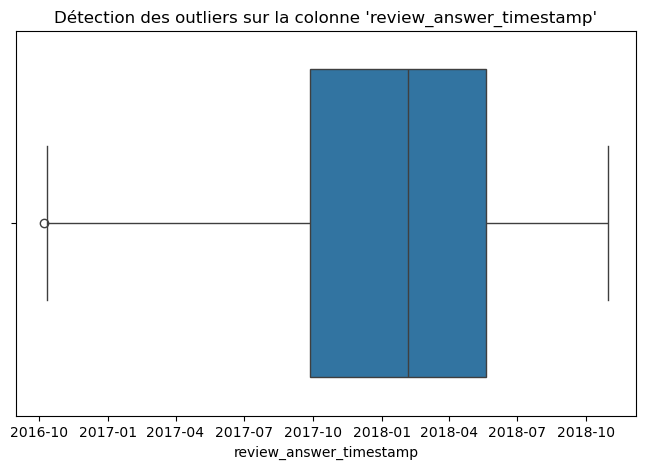

In [76]:


plt.figure(figsize=(8,5))
sns.boxplot(data=df_reviews, x='review_answer_timestamp')
plt.title("Détection des outliers sur la colonne 'review_answer_timestamp'")
plt.show()


Text(0.5, 1.0, "Détection des outliers sur la colonne 'review_creation_date'")

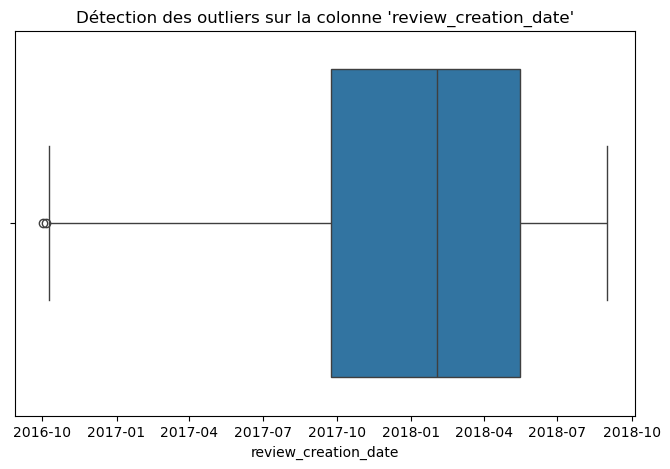

In [77]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df_reviews, x='review_creation_date')
plt.title("Détection des outliers sur la colonne 'review_creation_date'")

In [ ]:
df_reviews.to_csv(r"1_Data_Row/raw/Dataclean/olist_reviews_dataset_CLEAN.csv", index=False)

**PROJET DEMO DAY : PERFORMANCE SUPPLY CHAIN**

In [280]:
pip install pandas numpy 

Note: you may need to restart the kernel to use updated packages.


In [281]:
# Chargement des libraries nécessaires
import pandas as pd
import numpy as np
import pathlib as plib


In [310]:
# Chargement des datasets
products = pd.read_csv(r"C:\Users\marin\OneDrive\Bureau\Formation Data Analysis Fullstack\Projets\Projet Supply Chain\Data Olist\Raw\olist_products_dataset.csv")
order_items = pd.read_csv(r"C:\Users\marin\OneDrive\Bureau\Formation Data Analysis Fullstack\Projets\Projet Supply Chain\Data Olist\Raw\olist_order_items_dataset.csv")
category= pd.read_csv(r"C:\Users\marin\OneDrive\Bureau\Formation Data Analysis Fullstack\Projets\Projet Supply Chain\Data Olist\Raw\product_category_name_translation.csv")

NETTOYAGE DES DONNÉES - PRODUCTS

**Exploration initiale des datasets : products**

In [283]:
# Aperçu products
display(products.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0000000000,287.0000000000,1.0000000000,225.0000000000,16.0000000000,10.0000000000,14.0000000000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0000000000,276.0000000000,1.0000000000,1000.0000000000,30.0000000000,18.0000000000,20.0000000000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0000000000,250.0000000000,1.0000000000,154.0000000000,18.0000000000,9.0000000000,15.0000000000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0000000000,261.0000000000,1.0000000000,371.0000000000,26.0000000000,4.0000000000,26.0000000000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0000000000,402.0000000000,4.0000000000,625.0000000000,20.0000000000,17.0000000000,13.0000000000


In [284]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [285]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.0000000000,32341.0000000000,32341.0000000000,32949.0000000000,32949.0000000000,32949.0000000000,32949.0000000000
mean,48.4769487647,771.4952846232,2.1889861167,2276.4724877842,30.8150778476,16.9376612340,23.1967282770
std,10.2457407252,635.1152246350,1.7367656379,4282.0387309776,16.9144580541,13.6375540617,12.0790474532
min,5.0000000000,4.0000000000,1.0000000000,0.0000000000,7.0000000000,2.0000000000,6.0000000000
25%,42.0000000000,339.0000000000,1.0000000000,300.0000000000,18.0000000000,8.0000000000,15.0000000000
50%,51.0000000000,595.0000000000,1.0000000000,700.0000000000,25.0000000000,13.0000000000,20.0000000000
75%,57.0000000000,972.0000000000,3.0000000000,1900.0000000000,38.0000000000,21.0000000000,30.0000000000
max,76.0000000000,3992.0000000000,20.0000000000,40425.0000000000,105.0000000000,105.0000000000,118.0000000000


**Analyse des doublons**

In [286]:
# Vérification des doublons dans products
products['product_id'].nunique(), products.shape[0]
# Aucun doublon dans products

(32951, 32951)

**Analyse et traitement des valeurs manquantes**

In [287]:
# Vérification des valeurs manquantes
products.isna().sum().sort_values(ascending=False)


product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64

Traitement des valeurs manquantes : 
- product_category_name : création catégorie "unknown" 
- suppression des colonnes inutiles pour analyse : product_description_lenght, product_name_lenght et product_photos_qty
- remplacement des valeurs manquantes pour les autres colonnes par la médiane de la catégorie

In [288]:
# Remplacer les valeurs manquantes dans la colonne product_category_name
products_clean['product_category_name'] = products_clean['product_category_name'].fillna('unknown')

In [289]:
# Suppression des colonnes inutiles
cols_to_drop = ['product_description_lenght', 'product_name_lenght', 'product_photos_qty']
products_clean = products_clean.drop(columns=cols_to_drop, errors='ignore')


In [290]:
# Affiche les colonnes restantes après nettoyage
products_clean.columns.tolist()


['product_id',
 'product_category_name',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_volume_cm3']

In [291]:
# Liste des colonnes numériques à traiter
cols_numeriques = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Remplacer les NaN par la médiane de leur catégorie
for col in cols_numeriques:
    products_clean[col] = products_clean.groupby('product_category_name')[col].transform(
        lambda x: x.fillna(x.median())
    )


In [292]:
# Vérification des valeurs manquantes après traitement
products_clean.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
product_volume_cm3       0
dtype: int64

**Analyse et traitement des valeurs aberrantes**

In [293]:
# Analyse des valeurs aberrantes dans les colonnes de caractéristiques 
cols_caracteristiques = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in cols_caracteristiques:
    print(f"{col} : min={products_clean[col].min()}, max={products_clean[col].max()}")


product_weight_g : min=2.0, max=40425.0
product_length_cm : min=7.0, max=105.0
product_height_cm : min=2.0, max=105.0
product_width_cm : min=6.0, max=118.0


In [294]:
# Sélection des produits avec poids = 0
produits_poids_zero = products_clean[products_clean['product_weight_g'] == 0]

# Afficher combien il y en a
print(f"Nombre de produits avec un poids de 0 g : {len(produits_poids_zero)}")

# Afficher les 10 premiers pour inspection
produits_poids_zero.head(10)


Nombre de produits avec un poids de 0 g : 0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3


In [295]:
# Affiche toutes les décimales sans arrondi / vérification des 0 comme vraies valeurs
pd.set_option('display.float_format', '{:.10f}'.format)

In [296]:
poids_zero = products_clean[products_clean['product_weight_g'] == 0]

print(f"Nombre de produits avec un poids exactement à 0 : {len(poids_zero)}")
poids_zero[['product_id', 'product_category_name', 'product_weight_g']].head(10)



Nombre de produits avec un poids exactement à 0 : 0


,product_id,product_category_name,product_weight_g


Valeurs à 0 appartiennent à la catégorie de linge de maison : 0.0g impossible.
Traitement de ces données en tant que valeurs aberrantes.

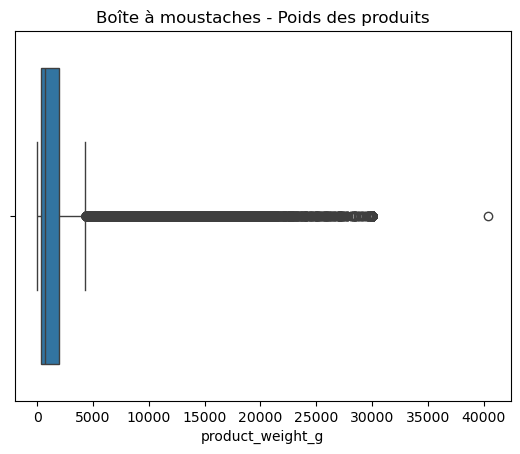

In [297]:
# Visualisation des valeurs extrêmes pour product_weight_g
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=products_clean["product_weight_g"])
plt.title("Boîte à moustaches - Poids des produits")
plt.show()

La plupart des produits sont inférieurs à 5 000 g (5 kg) mais certains montent jusqu’à 40 000 g (40 kg).

A traiter : 
- les valeurs de poids = 0g
- les valeurs extrêmes / analyser selon la catégorie de produit afin de confirmer si valeur aberrante.

In [298]:
# Calcul des bornes IQR pour product_weight_g
Q1 = products_clean["product_weight_g"].quantile(0.25)
Q3 = products_clean["product_weight_g"].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Borne basse : {Q1 - 1.5*IQR}, Borne haute : {Q3 + 1.5*IQR}")


Q1: 300.0, Q3: 1900.0, IQR: 1600.0
Borne basse : -2100.0, Borne haute : 4300.0


In [299]:
# Identification des outliers pour product_weight_g
# Valeurs supérieures à la borne haute
outliers = products_clean[products_clean["product_weight_g"] > Q3 + 1.5*IQR]
print(outliers.shape)
outliers.head(20)


(4551, 7)


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,18350.0000000000,70.0000000000,24.0000000000,44.0000000000,73920.0000000000
11,03b63c5fc16691530586ae020c345514,bebes,7150.0000000000,50.0000000000,19.0000000000,45.0000000000,42750.0000000000
33,1eba879220bd0981a0e2fbab499ed4e1,moveis_escritorio,8950.0000000000,52.0000000000,51.0000000000,17.0000000000,45084.0000000000
35,5370b82a213393979691c98074265584,bebes,7950.0000000000,33.0000000000,30.0000000000,44.0000000000,43560.0000000000
36,b8dac5113b06a97e64943234522572b9,automotivo,6000.0000000000,87.0000000000,3.0000000000,42.0000000000,10962.0000000000
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,6350.0000000000,45.0000000000,15.0000000000,35.0000000000,23625.0000000000
44,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,11750.0000000000,18.0000000000,40.0000000000,79.0000000000,56880.0000000000
46,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,15350.0000000000,47.0000000000,40.0000000000,47.0000000000,88360.0000000000
50,5eaa343860dc445b3fd43d1b682809fd,esporte_lazer,4800.0000000000,60.0000000000,30.0000000000,15.0000000000,27000.0000000000
53,3fcd8dfe610c62edfb51de2630cd9ef4,bebes,5700.0000000000,41.0000000000,17.0000000000,49.0000000000,34153.0000000000


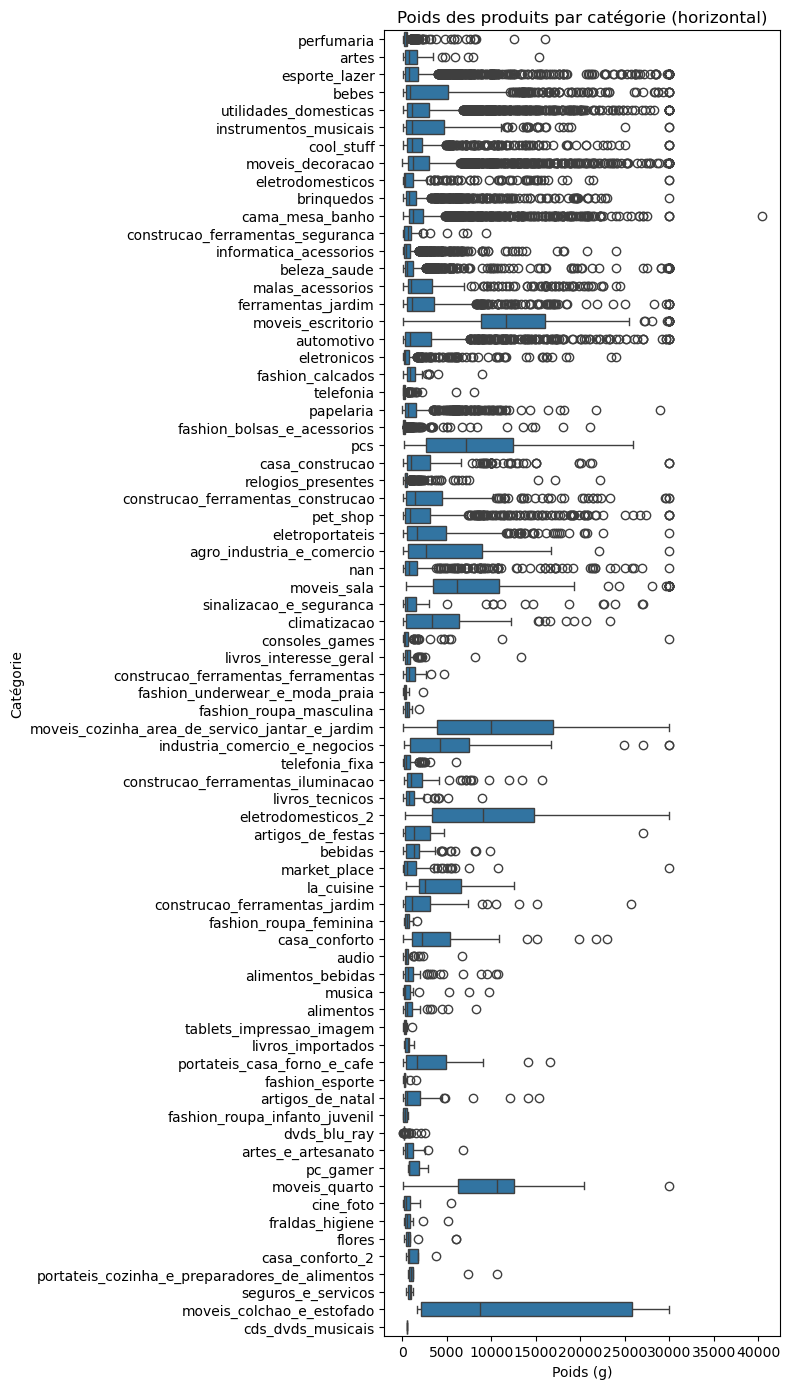

In [300]:
# Visualisation des poids par catégorie de produit
plt.figure(figsize=(8,14))
sns.boxplot(
    y='product_category_name', 
    x='product_weight_g', 
    data=products_clean
)
plt.title("Poids des produits par catégorie (horizontal)")
plt.xlabel("Poids (g)")
plt.ylabel("Catégorie")
plt.tight_layout()
plt.show()



Les outliers ne sont pas aléatoires — ils se concentrent dans certaines catégories.
Certaines catégories ont une amplitude de poids logique (ex. moveis ou auto).
D’autres présentent des écarts importants mais qui peut correspondre à un produit particulier d'une catégorie de produit. Nous ne traitons pas ces données en données aberrantes et les conservons.

***Taitement uniquement des poids de produit à 0g en remplaçant par la médiane de sa catégorie de produit.***

In [301]:
# valeur aberrante détectée pour product_weight_g (0 g)
# On remplace les 0 g par la médiane de chaque catégorie de produit
categories = products_clean['product_category_name'].unique()   
for category in categories:
    median_weight = products_clean.loc[
        (products_clean['product_category_name'] == category) & 
        (products_clean['product_weight_g'] > 0), 
        'product_weight_g'
    ].median()
    
    products_clean.loc[
        (products_clean['product_category_name'] == category) & 
        (products_clean['product_weight_g'] == 0), 
        'product_weight_g'
    ] = median_weight   
    

In [302]:
# vérification du remplacement
poids_zero_apres = products_clean[products_clean['product_weight_g'] == 0]
print(f"Nombre de produits avec un poids de 0 g après remplacement : {len(poids_zero_apres)}")

poids_zero_apres.head(10)

Nombre de produits avec un poids de 0 g après remplacement : 0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3


**Création colonne volume pour analyse**

In [303]:
# Création d'une nouvelle colonne : volume du produit en cm3 - variable pour analyse future : corrélation volume produit/retard livraison
# volume = longueur * hauteur * largeur 
products_clean['product_volume_cm3'] = (
    products_clean['product_length_cm'] *
    products_clean['product_height_cm'] *
    products_clean['product_width_cm']
)


**Traitement format colonne category_name**

In [304]:
# Traitement de la colonne category_name
# Même traitement dans la table category_name

products_clean['product_category_name'] = (
    products_clean['product_category_name']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

**Sauvegarde dataset products_clean**

In [305]:
# Vérification avant sauvegarde des valeurs manquantes
products_clean.isna().sum().sort_values(ascending=False)


product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
product_volume_cm3       0
dtype: int64

In [306]:
# Aperçu du dataset nettoyé avant sauvegarde
display(products_clean.head())

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0000000000,16.0000000000,10.0000000000,14.0000000000,2240.0000000000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0000000000,30.0000000000,18.0000000000,20.0000000000,10800.0000000000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0000000000,18.0000000000,9.0000000000,15.0000000000,2430.0000000000
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0000000000,26.0000000000,4.0000000000,26.0000000000,2704.0000000000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0000000000,20.0000000000,17.0000000000,13.0000000000,4420.0000000000


In [307]:
# Table product nettoyée sauvegardée
products_clean.to_csv(r"G:\Mon Drive\PROJET DEMO DAY\Data Clean/products_clean.csv", index=False)


NETTOYAGE DES DONNÉES : CATEGORY

**Exploration initiale dataset category**

In [311]:
# Aperçu Category
display(category)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [312]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Analyse des doublons**

In [313]:
category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Valeurs uniques, pas de doublons.

**Traitement format colonne category_name**

In [314]:
# normalisation des noms de colonnes (même format que products_clean)
category.columns = ['product_category_name', 'product_category_name_english'] 

In [315]:
# Traitement des colonnes : même traitement que dans la table products_clean

category['product_category_name'] = (
    category['product_category_name']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

category['product_category_name_english'] = (
    category['product_category_name_english']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

**Sauvegarde dataset category_clean**

In [316]:
# Table product_category nettoyée sauvegardée
category.to_csv(r"G:\Mon Drive\PROJET DEMO DAY\Data Clean/category_clean.csv", index=False)


NETTOYAGE DES DONNEES : ORDER_ITEMS

**Exploration initiale dataset order_items**

In [ ]:
# Aperçu order_items
order_items.head(600)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9000000000,13.2900000000
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9000000000,19.9300000000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0000000000,17.8700000000
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.9900000000,12.7900000000
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9000000000,18.1400000000


In [ ]:
# Informations order_items

print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


Attention shipping_limit_date est en object : type à modifier en date

In [ ]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.0000000000,112650.0000000000,112650.0000000000
mean,1.1978339991,120.6537390146,19.9903199290
std,0.7051240314,183.6339280503,15.8064054123
min,1.0000000000,0.8500000000,0.0000000000
25%,1.0000000000,39.9000000000,13.0800000000
50%,1.0000000000,74.9900000000,16.2600000000
75%,1.0000000000,134.9000000000,21.1500000000
max,21.0000000000,6735.0000000000,409.6800000000


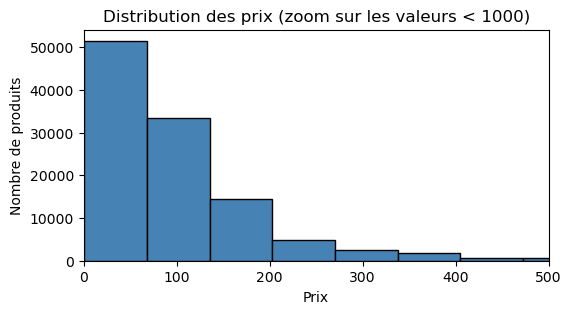

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.hist(order_items["price"], bins=100, color='steelblue', edgecolor='black')
plt.title("Distribution des prix (zoom sur les valeurs < 1000)")
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")
plt.xlim(0, 500)  # <--- zoom sur la partie la plus dense
plt.show()



La distribution des prix montre une forte concentration de produits à bas prix (principalement en dessous de 100 €).

**Analyse des doublons**

In [ ]:
# Vérification des doublons dans order_items
# Vérifier que la combinaison order_id et order_item_id est unique
# (un même order_id peut apparaître plusieurs fois avec des order_item_id différents)
(order_items[['order_id', 'order_item_id']].duplicated().sum())


np.int64(0)

Résultat 0 : pas de doublon

**Traitement type colonne shipping_limit_date**

In [ ]:
# shipping_limit_date est en object : type à modifier en date
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')

**Analyse et traitement des valeurs manquantes**

In [ ]:
# Vérification des valeurs manquantes
order_items.isna().sum() # aucune valeur manquante

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Analyse et traitement des valeurs aberrantes**

In [ ]:
# Vérification des valeurs aberrantes dans les colonnes numériques
# Filtrer les valeurs inférieures ou égales à 0
prix_anormaux = order_items[order_items['price'] <= 0]
livraison_anormale = order_items[order_items['freight_value'] <= 0]

# Aperçu des lignes suspectes
print(f"Produits avec un prix ≤ 0 : {len(prix_anormaux)}")
print(f"Produits avec un coût de livraison ≤ 0 : {len(livraison_anormale)}")

display(livraison_anormale[['order_id', 'product_id', 'price', 'freight_value']].head(10))

Produits avec un prix ≤ 0 : 0
Produits avec un coût de livraison ≤ 0 : 383


,order_id,product_id,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,53b36df67ebb7c41585e8d54d6772e08,99.9000000000,0.0000000000
258,00a870c6c06346e85335524935c600c0,aca2eb7d00ea1a7b8ebd4e68314663af,69.9000000000,0.0000000000
483,011c899816ea29773525bd3322dbb6aa,53b36df67ebb7c41585e8d54d6772e08,99.9000000000,0.0000000000
508,012b3f6ab7776a8ab3443a4ad7bef2e6,422879e10f46682990de24d770e7f83d,53.9000000000,0.0000000000
509,012b3f6ab7776a8ab3443a4ad7bef2e6,422879e10f46682990de24d770e7f83d,53.9000000000,0.0000000000
1784,04105b54650921ca3246f52e6f175f46,aca2eb7d00ea1a7b8ebd4e68314663af,69.9000000000,0.0000000000
2232,0517a3e68dac3308995edca2144db36e,53b36df67ebb7c41585e8d54d6772e08,99.9000000000,0.0000000000
2714,061ba2e2d7544790b6ed6b5b4dd9278c,53b36df67ebb7c41585e8d54d6772e08,110.0000000000,0.0000000000
3224,07441f525824bc6b31d4dc19c5d49fc9,53b36df67ebb7c41585e8d54d6772e08,106.9000000000,0.0000000000
3378,079f16689c29acb6cab92978e6af2137,aca2eb7d00ea1a7b8ebd4e68314663af,69.9000000000,0.0000000000


In [ ]:
# Analyse des frais de port à 0 par seller_id
freight_zero_count = (
    order_items[order_items['freight_value'] == 0]
    .groupby('seller_id')
    .size()
    .reset_index(name='nb_freight_zero')
    .sort_values(by='nb_freight_zero', ascending=False)
)

freight_zero_count.head(10)

,seller_id,nb_freight_zero
3,7d13fca15225358621be4086e1eb0964,158
5,955fee9216a65b617aa5c0531780ce60,99
0,1f50f920176fa81dab994f9023523100,56
2,4869f7a5dfa277a7dca6462dcf3b52b2,56
1,37be5a7c751166fbc5f8ccba4119e043,9
7,c826c40d7b19f62a09e2d7c5e7295ee2,2
4,8581055ce74af1daba164fdbd55a40de,1
6,bc2ac6b95e1accce9858528ee566c17e,1
8,cc419e0650a3c5ba77189a1882b7556a,1


Sur 3095 sellers seulement 9 ressortent avec des livraisons à 0€, avec une concentration sur 4 sellers.
On ne considère donc pas ces valeurs comme aberrantes mais comme des actions isolées de **livraisons offertes**.

In [ ]:
# Création d'une nouvelle colonne : étiquette de frais de port : payant et gratuit
# Permet de conserver l'information tout en facilitant les analyses futures
order_items['freight_label'] = np.where(
    order_items['freight_value'] == 0,
    'gratuit',
    'payant'
)
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_label
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9000000000,13.2900000000,payant
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9000000000,19.9300000000,payant
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0000000000,17.8700000000,payant
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.9900000000,12.7900000000,payant
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9000000000,18.1400000000,payant


In [ ]:
# Calcul de la moyenne des frais de port pour les commandes payantes
order_items_paid = order_items[order_items['freight_label'] == 'payant']
order_items_paid['freight_value'].mean()

np.float64(20.05851710654066)

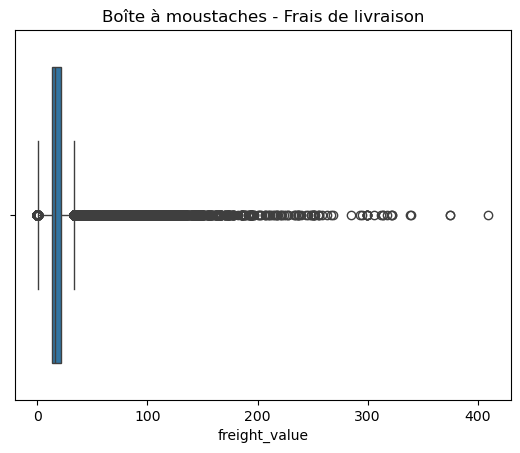

In [ ]:
# Analyse des valeurs extrêmes pour freight_value 
sns.boxplot(x=order_items["freight_value"])
plt.title("Boîte à moustaches - Frais de livraison")
plt.show()

On voit que la grande majorité des frais de livraison sont très faibles et concentrés.

Les valeurs extrêmes, jusqu’à 400, sont rares (points isolés à droite).

Cela signifie que :
95 % environ des commandes ont des frais faibles,
Quelques commandes coûtent extrêmement cher à livrer, ce qui tire la distribution vers la droite (distribution asymétrique positive).

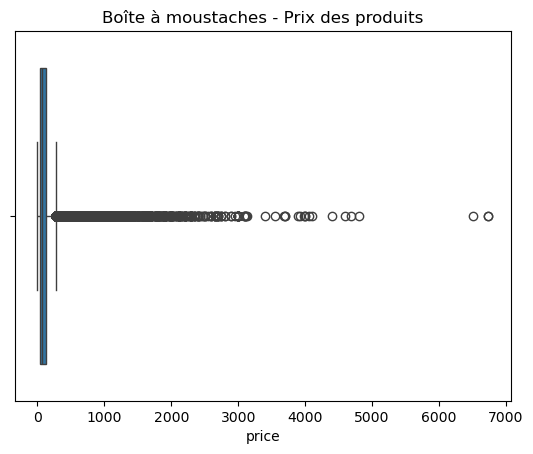

In [ ]:
# Analyse des valeurs extrêmes pour Price
import seaborn as sns
sns.boxplot(x=order_items["price"])
plt.title("Boîte à moustaches - Prix des produits")
plt.show()

La majorité des produits sont vendus à un prix faible, tandis que quelques produits atteignent des montants beaucoup plus élevés (jusqu’à 7000).
Ces valeurs extrêmes peuvent correspondre à des produits haut de gamme ou à des erreurs de saisie.

Nous conservons les valeurs extrêmes droites et les considérons comme produit haut de gamme.

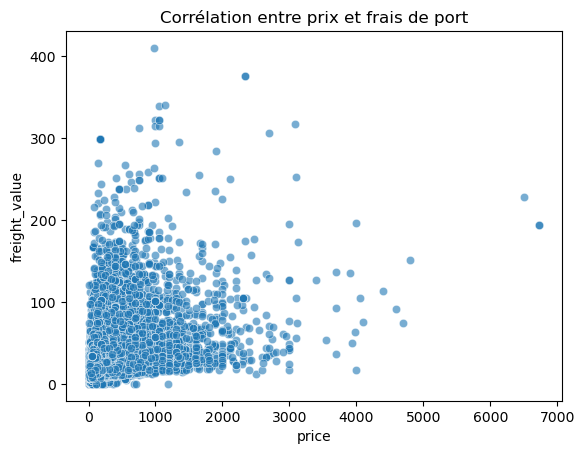

In [ ]:
# Visualisation de la corrélation entre price et freight_value
sns.scatterplot(x="price", y="freight_value", data=order_items, alpha=0.6)
plt.title("Corrélation entre prix et frais de port")
plt.show()


In [ ]:
# Table order_items nettoyée sauvegardée
order_items.to_csv(r"G:\Mon Drive\PROJET DEMO DAY\Data Clean/order_items_clean.csv", index=False)